In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
# Import the data set
df = pd.read_excel("C:/Users/asus/Downloads/Olympic Sports dataset CW3 (2).xlsx")

In [3]:
df.head(5)

,Subsidiary/Country,Year,Month,Sport product category,Sales value,Sales volume,Unnamed: 6,Unnamed: 7
0,France,2020,1,Outerwear,38760,760,NaN,NaN
1,France,2020,1,t-shirts,6479,209,NaN,NaN
2,France,2020,1,shirts,14070,402,NaN,NaN
3,France,2020,1,shorts,14685,445,NaN,NaN
4,France,2020,1,trousers,22468,548,NaN,NaN


In [4]:
df.shape

(648, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 648 entries, 0 to 647
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Subsidiary/Country      648 non-null    object 
 1   Year                    648 non-null    int64  
 2   Month                   648 non-null    int64  
 3   Sport product category  648 non-null    object 
 4   Sales value             648 non-null    int64  
 5   Sales volume            648 non-null    int64  
 6   Unnamed: 6              0 non-null      float64
 7   Unnamed: 7              6 non-null      float64
dtypes: float64(2), int64(4), object(2)
memory usage: 40.6+ KB


In [6]:
# Dropping the columns
df.drop(['Unnamed: 6','Unnamed: 7'],inplace= True,axis=1 )

In [7]:
df.head()

,Subsidiary/Country,Year,Month,Sport product category,Sales value,Sales volume
0,France,2020,1,Outerwear,38760,760
1,France,2020,1,t-shirts,6479,209
2,France,2020,1,shirts,14070,402
3,France,2020,1,shorts,14685,445
4,France,2020,1,trousers,22468,548


In [8]:
# cheaking for null values
df.isna().sum().sum()

0

In [9]:
# Cheaking for duplicates
df.duplicated().sum()

0

In [10]:
# Value_counts
df['Sport product category'].value_counts()

Sport product category
Outerwear         108
t-shirts          108
shirts            108
shorts            108
footwear          105
trousers          104
trousers$£%&        4
foottw$!&ear        3
Name: count, dtype: int64

In [11]:
df['Subsidiary/Country'].value_counts()

Subsidiary/Country
UK         216
Germany    216
France     211
Fran         5
Name: count, dtype: int64

In [12]:
df['Year'].value_counts()

Year
2020    216
2021    216
2022    210
2042      6
Name: count, dtype: int64

In [13]:
filtered_df = df[df['Year'] == 2042]
filtered_df

,Subsidiary/Country,Year,Month,Sport product category,Sales value,Sales volume
210,France,2042,12,Outerwear,47517,1011
211,France,2042,12,t-shirts,20430,681
212,France,2042,12,shirts,22610,665
213,France,2042,12,shorts,3680,115
214,France,2042,12,trousers,20492,436
215,France,2042,12,footwear,37950,506


In [14]:
import pandas as pd
import numpy as np
from scipy.stats import zscore

df['Sales value zscore'] = zscore(df['Sales value'])

Q1 = df['Sales value'].quantile(0.25)
Q3 = df['Sales value'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df['IQR Outlier'] = (df['Sales value'] < lower_bound) | (df['Sales value'] > upper_bound)

zscore_threshold = 3
df['Z-Score Outlier'] = (df['Sales value zscore'] > zscore_threshold) | (df['Sales value zscore'] < -zscore_threshold)

# Optional: Filter the outliers for further analysis
iqr_outliers = df[df['IQR Outlier']]
zscore_outliers = df[df['Z-Score Outlier']]

print("IQR Outliers:")
print(iqr_outliers)

print("Z-Score Outliers:")
print(zscore_outliers)


IQR Outliers:
    Subsidiary/Country  Year  Month Sport product category  Sales value  \
449            Germany  2020      3             footwear         149076   
450            Germany  2020      4              Outerwear       163242   
479            Germany  2020      8             footwear         143370   
503            Germany  2020     12             footwear         161680   
569            Germany  2021     11             footwear         159120   
599            Germany  2022      4             footwear         173460   
612            Germany  2022      7              Outerwear       181370   
617            Germany  2022      7             footwear         212584   
618            Germany  2022      8              Outerwear       212850   
623            Germany  2022      8             footwear         191955   
624            Germany  2022      9              Outerwear       143725   
629            Germany  2022      9             footwear         168122   
635        

In [15]:
df['Sales value zscore'] = zscore(df['Sales value'])

zscore_threshold = 3
df_no_outliers_zscore = df[(df['Sales value zscore'] <= zscore_threshold) & (df['Sales value zscore'] >= -zscore_threshold)]

print("DataFrame without z-score outliers:")
df_no_outliers_zscore


DataFrame without z-score outliers:


,Subsidiary/Country,Year,Month,Sport product category,Sales value,Sales volume,Sales value zscore,IQR Outlier,Z-Score Outlier
0,France,2020,1,Outerwear,38760,760,-0.198160,False,False
1,France,2020,1,t-shirts,6479,209,-1.033923,False,False
2,France,2020,1,shirts,14070,402,-0.837391,False,False
3,France,2020,1,shorts,14685,445,-0.821468,False,False
4,France,2020,1,trousers,22468,548,-0.619964,False,False
...,...,...,...,...,...,...,...,...,...
642,Germany,2022,12,Outerwear,136046,2149,2.320599,False,False
643,Germany,2022,12,t-shirts,70490,1683,0.623337,False,False
644,Germany,2022,12,shirts,83240,1860,0.953438,False,False
645,Germany,2022,12,shorts,49736,826,0.086011,False,False


In [16]:
df_no_outliers_zscore.drop(['Sales value zscore','IQR Outlier','Z-Score Outlier'],inplace=True,axis=1)

C:\Users\asus\AppData\Local\Temp\ipykernel_2948\2170219220.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers_zscore.drop(['Sales value zscore','IQR Outlier','Z-Score Outlier'],inplace=True,axis=1)


In [17]:
# Table-A: Data and trends in sales volume and value by month and year

grouped_df = df_no_outliers_zscore.groupby(['Year', 'Month'])[['Sales value', 'Sales volume']].sum().reset_index()
print("Table-A: Data and trends in sales volume and value by month and year")
grouped_df

Table-A: Data and trends in sales volume and value by month and year


,Year,Month,Sales value,Sales volume
0,2020,1,647898,13083
1,2020,2,682317,11493
2,2020,3,757740,16227
3,2020,4,591159,13419
4,2020,5,706052,14804
5,2020,6,810487,15730
6,2020,7,857366,17894
7,2020,8,901387,18439
8,2020,9,718612,14847
9,2020,10,742225,15179


In [18]:
# Table-B: Benchmark comparisons of sport products categories performance covering sales volume and value by Year and month


grouped_df_category = df_no_outliers_zscore.groupby(['Sport product category'])[['Sales value', 'Sales volume']].sum().reset_index()
print(" Table-B: Benchmark comparisons of sport products categories performance covering sales volume and value by Year and month")
grouped_df_category

 Table-B: Benchmark comparisons of sport products categories performance covering sales volume and value by Year and month


,Sport product category,Sales value,Sales volume
0,Outerwear,8528406,167455
1,foottw$!&ear,198923,2523
2,footwear,8451359,105553
3,shirts,4126101,113684
4,shorts,2034070,55001
5,t-shirts,2777044,88582
6,trousers,1872652,38972
7,trousers$£%&,89876,1964


In [19]:
# Table-C:  Benchmark comparisons of sales volume and value between subsidiaries by Year and month


grouped_df_subsidiaries = df_no_outliers_zscore.groupby(['Subsidiary/Country'])[['Sales value', 'Sales volume']].sum().reset_index()
print("Table-C:  Benchmark comparisons of sales volume and value between subsidiaries by Year and month")
grouped_df_subsidiaries

Table-C:  Benchmark comparisons of sales volume and value between subsidiaries by Year and month


,Subsidiary/Country,Sales value,Sales volume
0,Fran,219543,3708
1,France,6470908,132560
2,Germany,11896279,246548
3,UK,9491701,190918


<Axes: xlabel='Subsidiary/Country', ylabel='Sales value'>

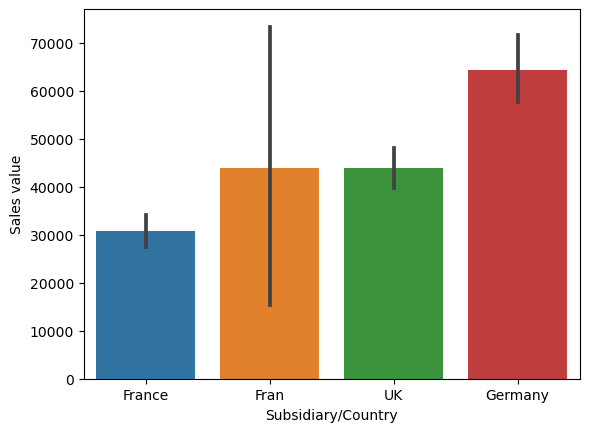

In [20]:
#EDA part
sns.barplot(data=df,x="Subsidiary/Country",y = 'Sales value')

In [21]:
print(df.dtypes)

Subsidiary/Country         object
Year                        int64
Month                       int64
Sport product category     object
Sales value                 int64
Sales volume                int64
Sales value zscore        float64
IQR Outlier                  bool
Z-Score Outlier              bool
dtype: object


In [22]:
df['Subsidiary/Country'] = df['Subsidiary/Country'].astype(str)
df['Year'] = df['Year'].astype(str)

<Axes: xlabel='Subsidiary/Country', ylabel='Sales value'>

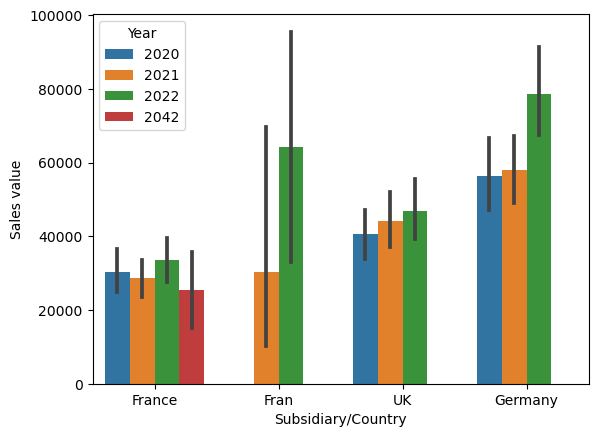

In [23]:
sns.barplot(data=df,x="Subsidiary/Country",y = 'Sales value',hue='Year')

In [24]:
filteredf = df[df['Subsidiary/Country'] == 'France']
filteredf['Year'].value_counts()

Year
2020    72
2021    69
2022    64
2042     6
Name: count, dtype: int64

In [25]:
filtered_g = df[df['Subsidiary/Country'] == 'Germany']
filtered_g['Year'].value_counts()

Year
2020    72
2021    72
2022    72
Name: count, dtype: int64

In [26]:
filtered_g.shape

(216, 9)

<Axes: xlabel='Sport product category', ylabel='count'>

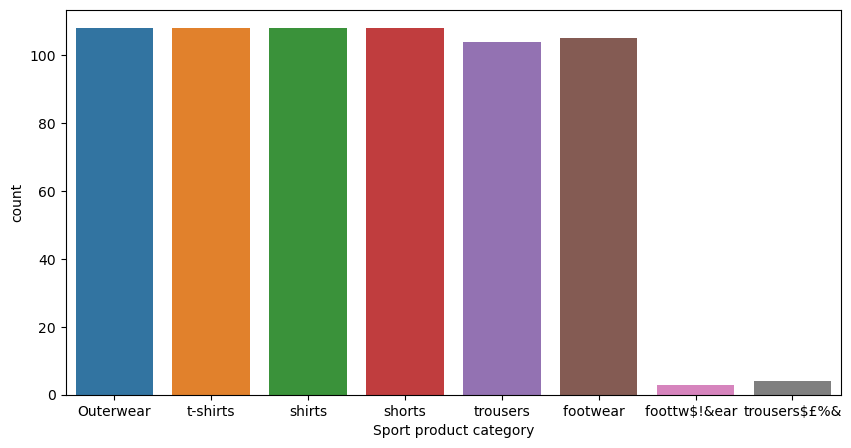

In [27]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='Sport product category')

In [28]:
df.head()

,Subsidiary/Country,Year,Month,Sport product category,Sales value,Sales volume,Sales value zscore,IQR Outlier,Z-Score Outlier
0,France,2020,1,Outerwear,38760,760,-0.198160,False,False
1,France,2020,1,t-shirts,6479,209,-1.033923,False,False
2,France,2020,1,shirts,14070,402,-0.837391,False,False
3,France,2020,1,shorts,14685,445,-0.821468,False,False
4,France,2020,1,trousers,22468,548,-0.619964,False,False


In [29]:
df['Subsidiary/Country'].value_counts()

Subsidiary/Country
UK         216
Germany    216
France     211
Fran         5
Name: count, dtype: int64

Text(0.5, 1.0, 'Sales volume and sales value by Country')

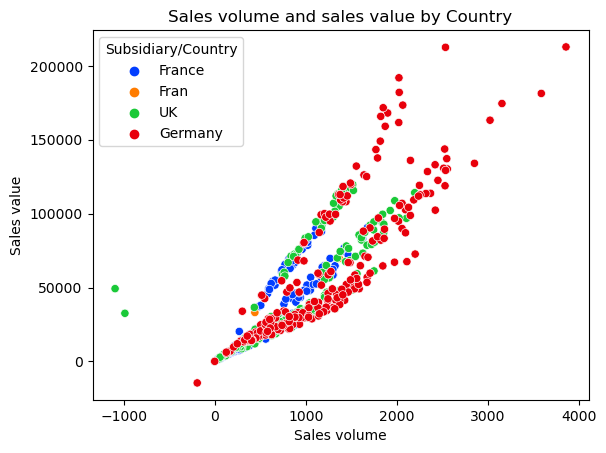

In [30]:
# Question 1: Perform a sales value and volume analysis of the three countries to identify
# the best country to open the first branded shop
sns.scatterplot(data=df,x='Sales volume',y='Sales value',hue='Subsidiary/Country',palette='bright')
plt.title("Sales volume and sales value by Country")

<Axes: xlabel='Sport product category', ylabel='count'>

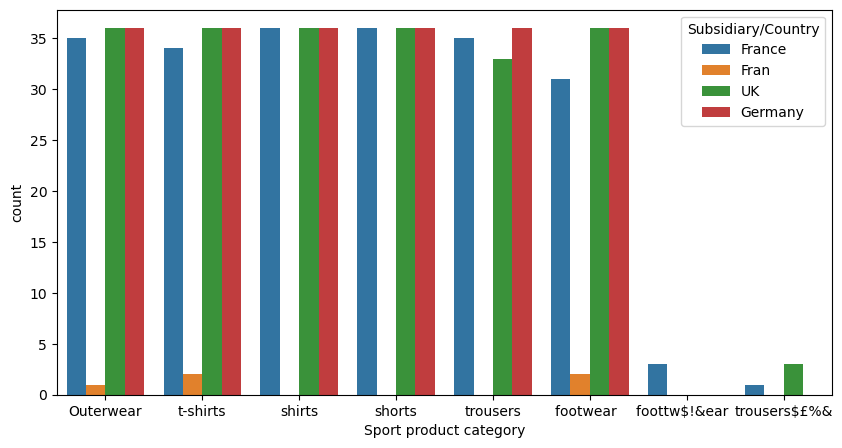

In [31]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='Sport product category',hue='Subsidiary/Country')

C:\Users\asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


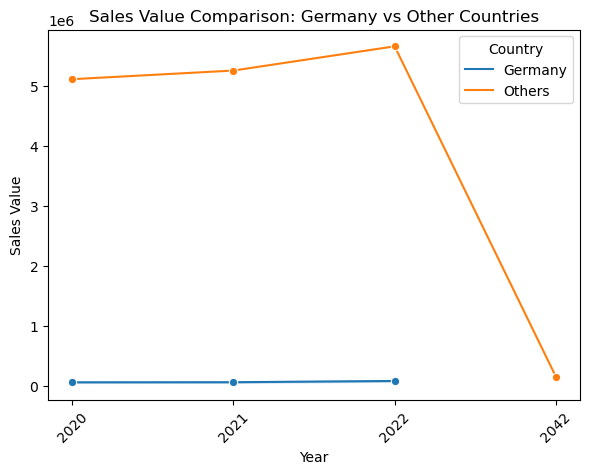

In [32]:
germany = 'Germany'

df_germany = df[df['Subsidiary/Country'] == germany]
df_others = df[df['Subsidiary/Country'] != germany]

# Sum the sales values for other countries by year
df_others_sum = df_others.groupby('Year')['Sales value'].sum().reset_index()
df_others_sum['Subsidiary/Country'] = 'Others'

# Merge Germany and others data into one DataFrame
df_combined = pd.concat([
    df_germany[['Year', 'Sales value']].assign(Subsidiary_Country=germany),
    df_others_sum.rename(columns={'Sales value': 'Sales value'}).assign(Subsidiary_Country='Others')
])

# Plotting
plt.figure(figsize=(6, 5))
sns.lineplot(data=df_combined, x='Year', y='Sales value', hue='Subsidiary_Country', marker='o')
plt.title('Sales Value Comparison: Germany vs Other Countries')
plt.xlabel('Year')
plt.ylabel('Sales Value')
plt.legend(title='Country')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()



In [33]:
# Summry exploretry data calculation, total seles value, total sales values

print("Sum of Sales value:",(df['Sales value'].sum()))
print("Sum of Sales volume:",(df['Sales volume'].sum()))
print("Avrage of Sales value:",(df['Sales value'].mean()))
print("Avrage of Sales volume:",(df['Sales volume'].mean()))
print("Standard of Sales value:",(df['Sales value'].std()))
print("Standard of Sales volume:",(df['Sales volume'].std()))

Sum of Sales value: 30076180
Sum of Sales volume: 601574
Avrage of Sales value: 46413.858024691355
Avrage of Sales volume: 928.354938271605
Standard of Sales value: 38654.4155145058
Standard of Sales volume: 607.3417773922631
